In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# roberta-large results

In [2]:
input_lens = [0, 50, 100, 150, 250]
accuracies = [43.98, 49.50, 51.76, 59.55, 65.00]
stds = [11.41, 5.21, 5.69, 5.82, 9.72]
n_samples = [1065, 337, 165, 89, 24]

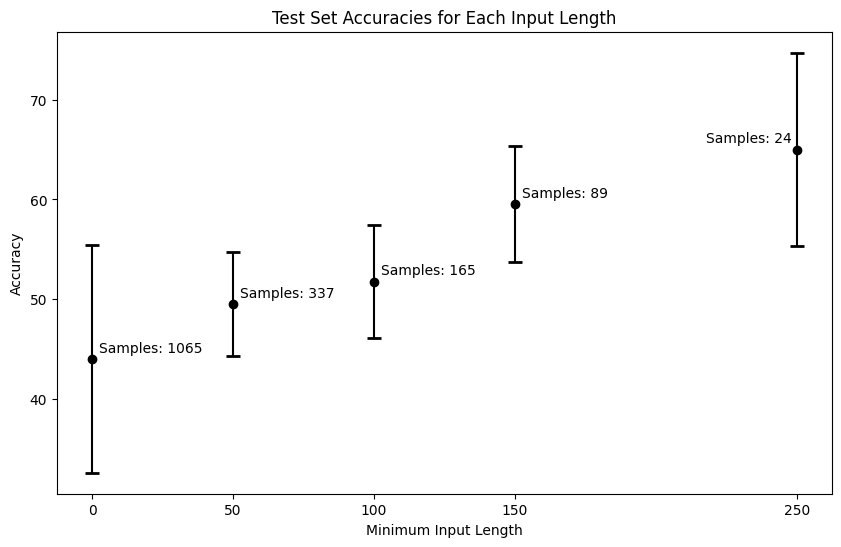

In [143]:
import matplotlib.pyplot as plt

# Data
input_lens = [0, 50, 100, 150, 250]
accuracies = [43.98, 49.5, 51.76, 59.55, 65.0]
stds = [11.41, 5.21, 5.69, 5.82, 9.72]
n_samples = [1065, 337, 165, 89, 24]

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(input_lens, accuracies, yerr=stds, fmt='o', capsize=5, capthick=2, ecolor='black', color='black', label='Accuracy')
for i, acc in enumerate(accuracies):
    if i == len(accuracies) - 1:  # If this is the last point
        plt.annotate(f'Samples: {n_samples[i]}', (input_lens[i], acc), xytext=(-65, 5), textcoords='offset points')
    else:
        plt.annotate(f'Samples: {n_samples[i]}', (input_lens[i], acc), xytext=(5, 5), textcoords='offset points')

# Axes labels
plt.xlabel('Minimum Input Length')
plt.ylabel('Accuracy')

plt.xticks(input_lens)

# Title
plt.title('Test Set Accuracies for Each Input Length')

# Save and show plot
plt.savefig('../TeX/figures/roberta-large_acc_for_min_len.png')
plt.show()

# Descriptives

In [5]:
from utils.preprocessing.transcript import load_data_with_labels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
pacs_labels_path = r"D:\PACS\PACS_labels_updated.xlsx"
all_docs_path = r"D:\PACS\PACS_docx"

train_path = r"D:\PACS\train_PACS.csv"
val_path = r"D:\PACS\val_PACS.csv"
test_path = r"D:\PACS\test_PACS.csv"

# Load data
full = load_data_with_labels(pacs_labels_path, all_docs_path)

train = pd.read_csv(train_path, sep="\t")
val = pd.read_csv(val_path, sep="\t")
test = pd.read_csv(test_path, sep="\t")

# Turn lengths
full["turn_length"] = full["text"].apply(lambda x: len(x.split()))
avg_turn_length = np.mean(full["turn_length"])

train["turn_length"] = train["text"].apply(lambda x: len(x.split()))
train_avg_turn_length = np.mean(train["turn_length"])

val["turn_length"] = val["text"].apply(lambda x: len(x.split()))
val_avg_turn_length = np.mean(val["turn_length"])

test["turn_length"] = test["text"].apply(lambda x: len(x.split()))
test_avg_turn_length = np.mean(test["turn_length"])


Loaded 78 documents.


In [57]:
full.rename(columns={"label": "Label"}, inplace=True)

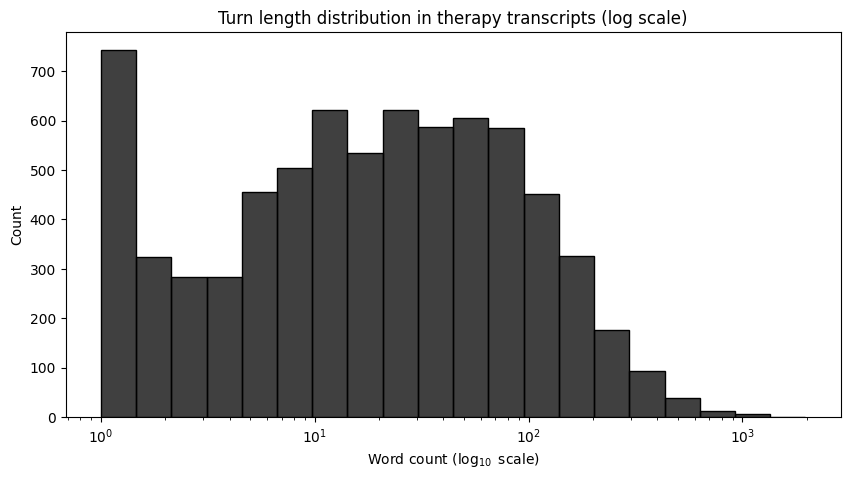

In [68]:
# Plot turn length distributions
plt.figure(figsize=(10, 5))
plt.xscale("log")
sns.histplot(full["turn_length"], bins=20, color="black", label="Full PACS data set")
plt.xlabel("Word count ($\log_{10}$ scale)")
plt.title("Turn length distribution in therapy transcripts (log scale)")
plt.savefig("../TeX/figures/log_turn_length_dist_full.png")
plt.show()

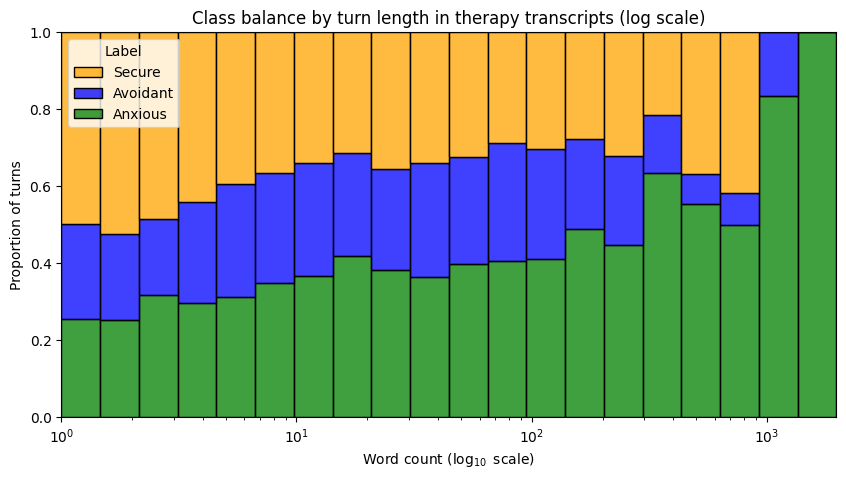

In [69]:
# Define the class names
class_names = {1: "Avoidant", 2: "Secure", 3: "Anxious"}

# Replace the numbers in the "label" column with the class names
full['Label'] = full['Label'].replace(class_names)

# Plot turn length distributions by class
# Define the color palette
palette = {"Avoidant": 'blue', "Secure": 'orange', "Anxious": 'green'}

plt.figure(figsize=(10, 5))
plt.xscale("log")
sns.histplot(data=full, x="turn_length", bins=20, hue="Label", palette=palette, multiple="fill", legend=True)
plt.xlabel("Word count ($\log_{10}$ scale)")
plt.ylabel("Proportion of turns")
plt.title("Class balance by turn length in therapy transcripts (log scale)")
plt.savefig("../TeX/figures/class_balance_by_log_turn_length.png")
plt.show()

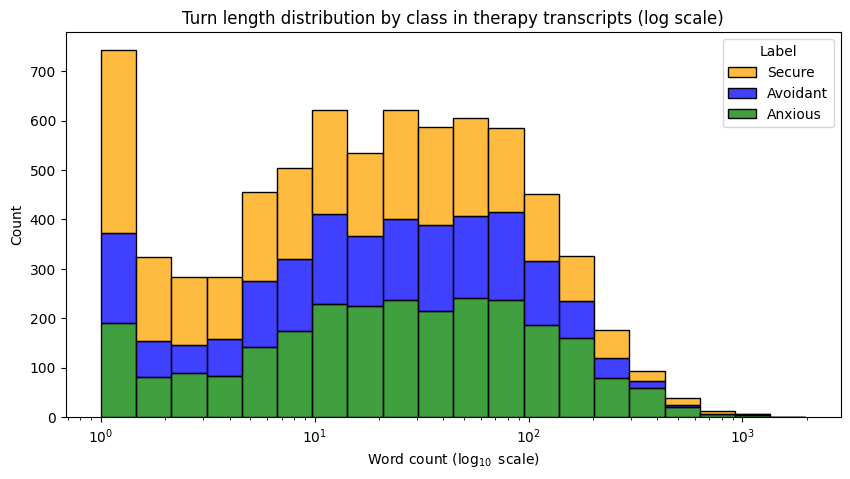

In [70]:
# Define the class names
class_names = {1: "Avoidant", 2: "Secure", 3: "Anxious"}

# Replace the numbers in the "label" column with the class names
full['Label'] = full['Label'].replace(class_names)

# Plot turn length distributions by class
# Define the color palette
palette = {"Avoidant": 'blue', "Secure": 'orange', "Anxious": 'green'}

plt.figure(figsize=(10, 5))
plt.xscale("log")
sns.histplot(data=full, x="turn_length", bins=20, hue="Label", palette=palette, multiple="stack", legend=True)
plt.xlabel("Word count ($\log_{10}$ scale)")
plt.title("Turn length distribution by class in therapy transcripts (log scale)")
plt.savefig("../TeX/figures/log_stack_turn_length_distribution_by_class.png")
# plt.savefig("/home/unicph.domain/wqs493/ucph/securegroupdir/SAMF-SODAS-PACS/Outputs/Descriptives/turn_length_distribution_by_class.png")
plt.show()

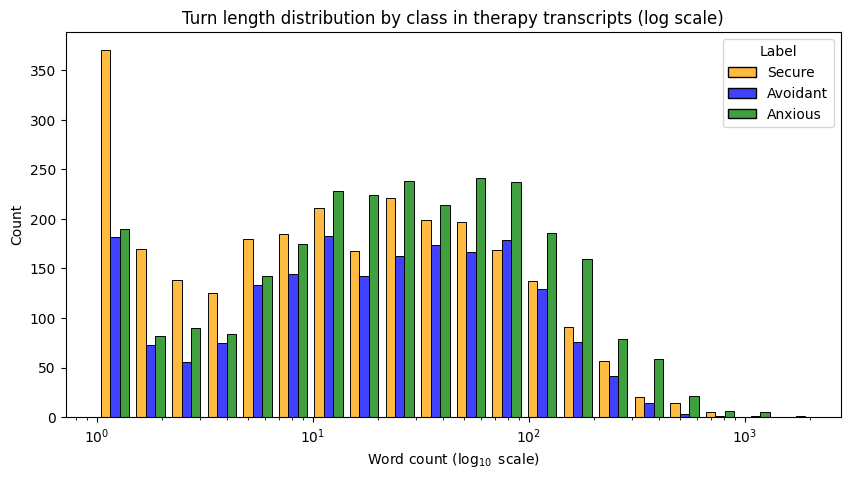

In [71]:
# Define the class names
class_names = {1: "Avoidant", 2: "Secure", 3: "Anxious"}

# Replace the numbers in the "label" column with the class names
full['Label'] = full['Label'].replace(class_names)


# Plot turn length distributions by class
# Define the color palette
palette = {"Avoidant": 'blue', "Secure": 'orange', "Anxious": 'green'}

plt.figure(figsize=(10, 5))
plt.xscale("log")
sns.histplot(data=full, x="turn_length", bins=20, hue="Label", palette=palette, multiple="dodge", legend=True, shrink=0.8)
plt.xlabel("Word count ($\log_{10}$ scale)")
plt.title("Turn length distribution by class in therapy transcripts (log scale)")
plt.savefig("../TeX/figures/log_dodge_turn_length_distribution_by_class.png")
plt.show()

# Error analysis

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
split1_preds = pd.read_csv(r"D:\PACS\robertal-large_150\split1_test_preds.csv", sep="\t")
split2_preds = pd.read_csv(r"D:\PACS\robertal-large_150\split2_test_preds.csv", sep="\t")
split3_preds = pd.read_csv(r"D:\PACS\robertal-large_150\split3_test_preds.csv", sep="\t")
split4_preds = pd.read_csv(r"D:\PACS\robertal-large_150\split4_test_preds.csv", sep="\t")
split5_preds = pd.read_csv(r"D:\PACS\robertal-large_150\split5_test_preds.csv", sep="\t")
targets = pd.read_csv(r"D:\PACS\robertal-large_150\test_combined_150.csv", sep="\t")

In [4]:
split1_preds.drop(columns=["document"], inplace=True)

split2_preds.drop(columns=["document", "text"], inplace=True)
split2_preds.rename(columns={"1": "2"}, inplace=True)

split3_preds.drop(columns=["document", "text"], inplace=True)
split3_preds.rename(columns={"1": "3"}, inplace=True)

split4_preds.drop(columns=["document", "text"], inplace=True)
split4_preds.rename(columns={"1": "4"}, inplace=True)

split5_preds.drop(columns=["document", "text"], inplace=True)
split5_preds.rename(columns={"1": "5"}, inplace=True)

all_preds = pd.concat([split1_preds, split2_preds, split3_preds, split4_preds, split5_preds], axis=1)

In [5]:
results = pd.concat([targets.drop(columns="text"), all_preds], axis=1)

In [6]:
results["vote"] = results.drop(columns=["label"]).mode(axis=1, numeric_only=True)[0]

In [7]:
results.isna().sum()

label       0
document    0
text        0
1           0
2           0
3           0
4           0
5           0
vote        0
dtype: int64

In [8]:
cm_total = confusion_matrix(results["label"], results["vote"], labels=[1, 2, 3])
cm_total

array([[ 3,  0, 19],
       [ 0,  4,  8],
       [ 2,  0, 53]], dtype=int64)

In [12]:
cm_1 = confusion_matrix(results["label"], results["1"], labels=[1, 2, 3])
cm_2 = confusion_matrix(results["label"], results["2"], labels=[1, 2, 3])
cm_3 = confusion_matrix(results["label"], results["3"], labels=[1, 2, 3])
cm_4 = confusion_matrix(results["label"], results["4"], labels=[1, 2, 3])
cm_5 = confusion_matrix(results["label"], results["5"], labels=[1, 2, 3])

In [13]:
cm_5

array([[ 7,  0, 15],
       [ 1,  3,  8],
       [ 7,  9, 39]], dtype=int64)

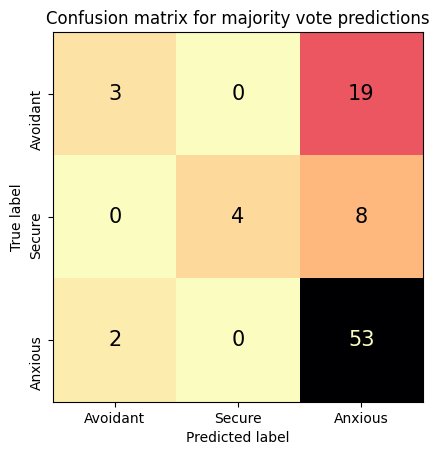

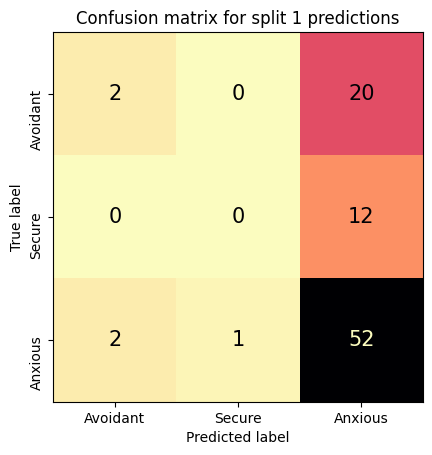

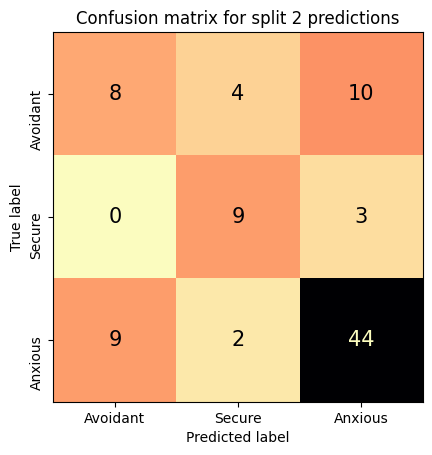

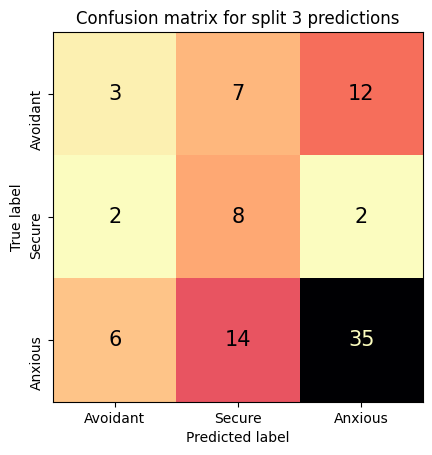

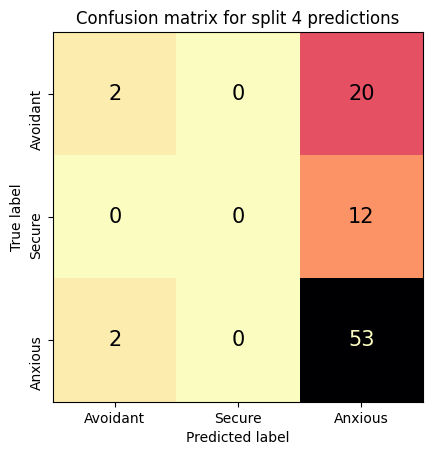

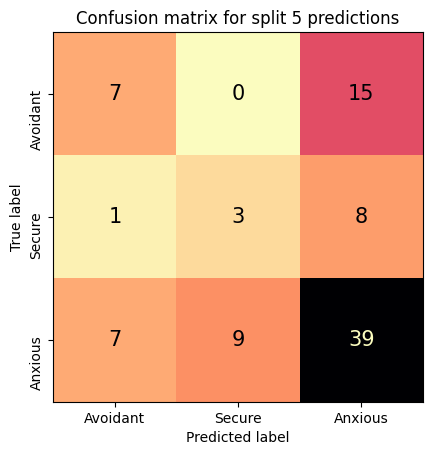

In [137]:
# cmap = sns.color_palette("YlOrRd", as_cmap=True)
# cmap = "PuBu"
# cmap = "PuRd"
# cmap = "RdPu"
# cmap = "YlOrBr"
# cmap = "afmhot_r"
# cmap = "binary"
# cmap = "bone_r"
# cmap = "copper_r"
# cmap = "flare"
cmap = "magma_r"

ConfusionMatrixDisplay(cm_total, display_labels=["Avoidant", "Secure", "Anxious"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for majority vote predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/roberta-large_150_combined_confusion_matrix.png")

ConfusionMatrixDisplay(cm_1, display_labels=["Avoidant", "Secure", "Anxious"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 1 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/roberta-large_150_split1_confusion_matrix.png")

ConfusionMatrixDisplay(cm_2, display_labels=["Avoidant", "Secure", "Anxious"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 2 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/roberta-large_150_split2_confusion_matrix.png")

ConfusionMatrixDisplay(cm_3, display_labels=["Avoidant", "Secure", "Anxious"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 3 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/roberta-large_150_split3_confusion_matrix.png")

ConfusionMatrixDisplay(cm_4, display_labels=["Avoidant", "Secure", "Anxious"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 4 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/roberta-large_150_split4_confusion_matrix.png")

ConfusionMatrixDisplay(cm_5, display_labels=["Avoidant", "Secure", "Anxious"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 5 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/roberta-large_150_split5_confusion_matrix.png")

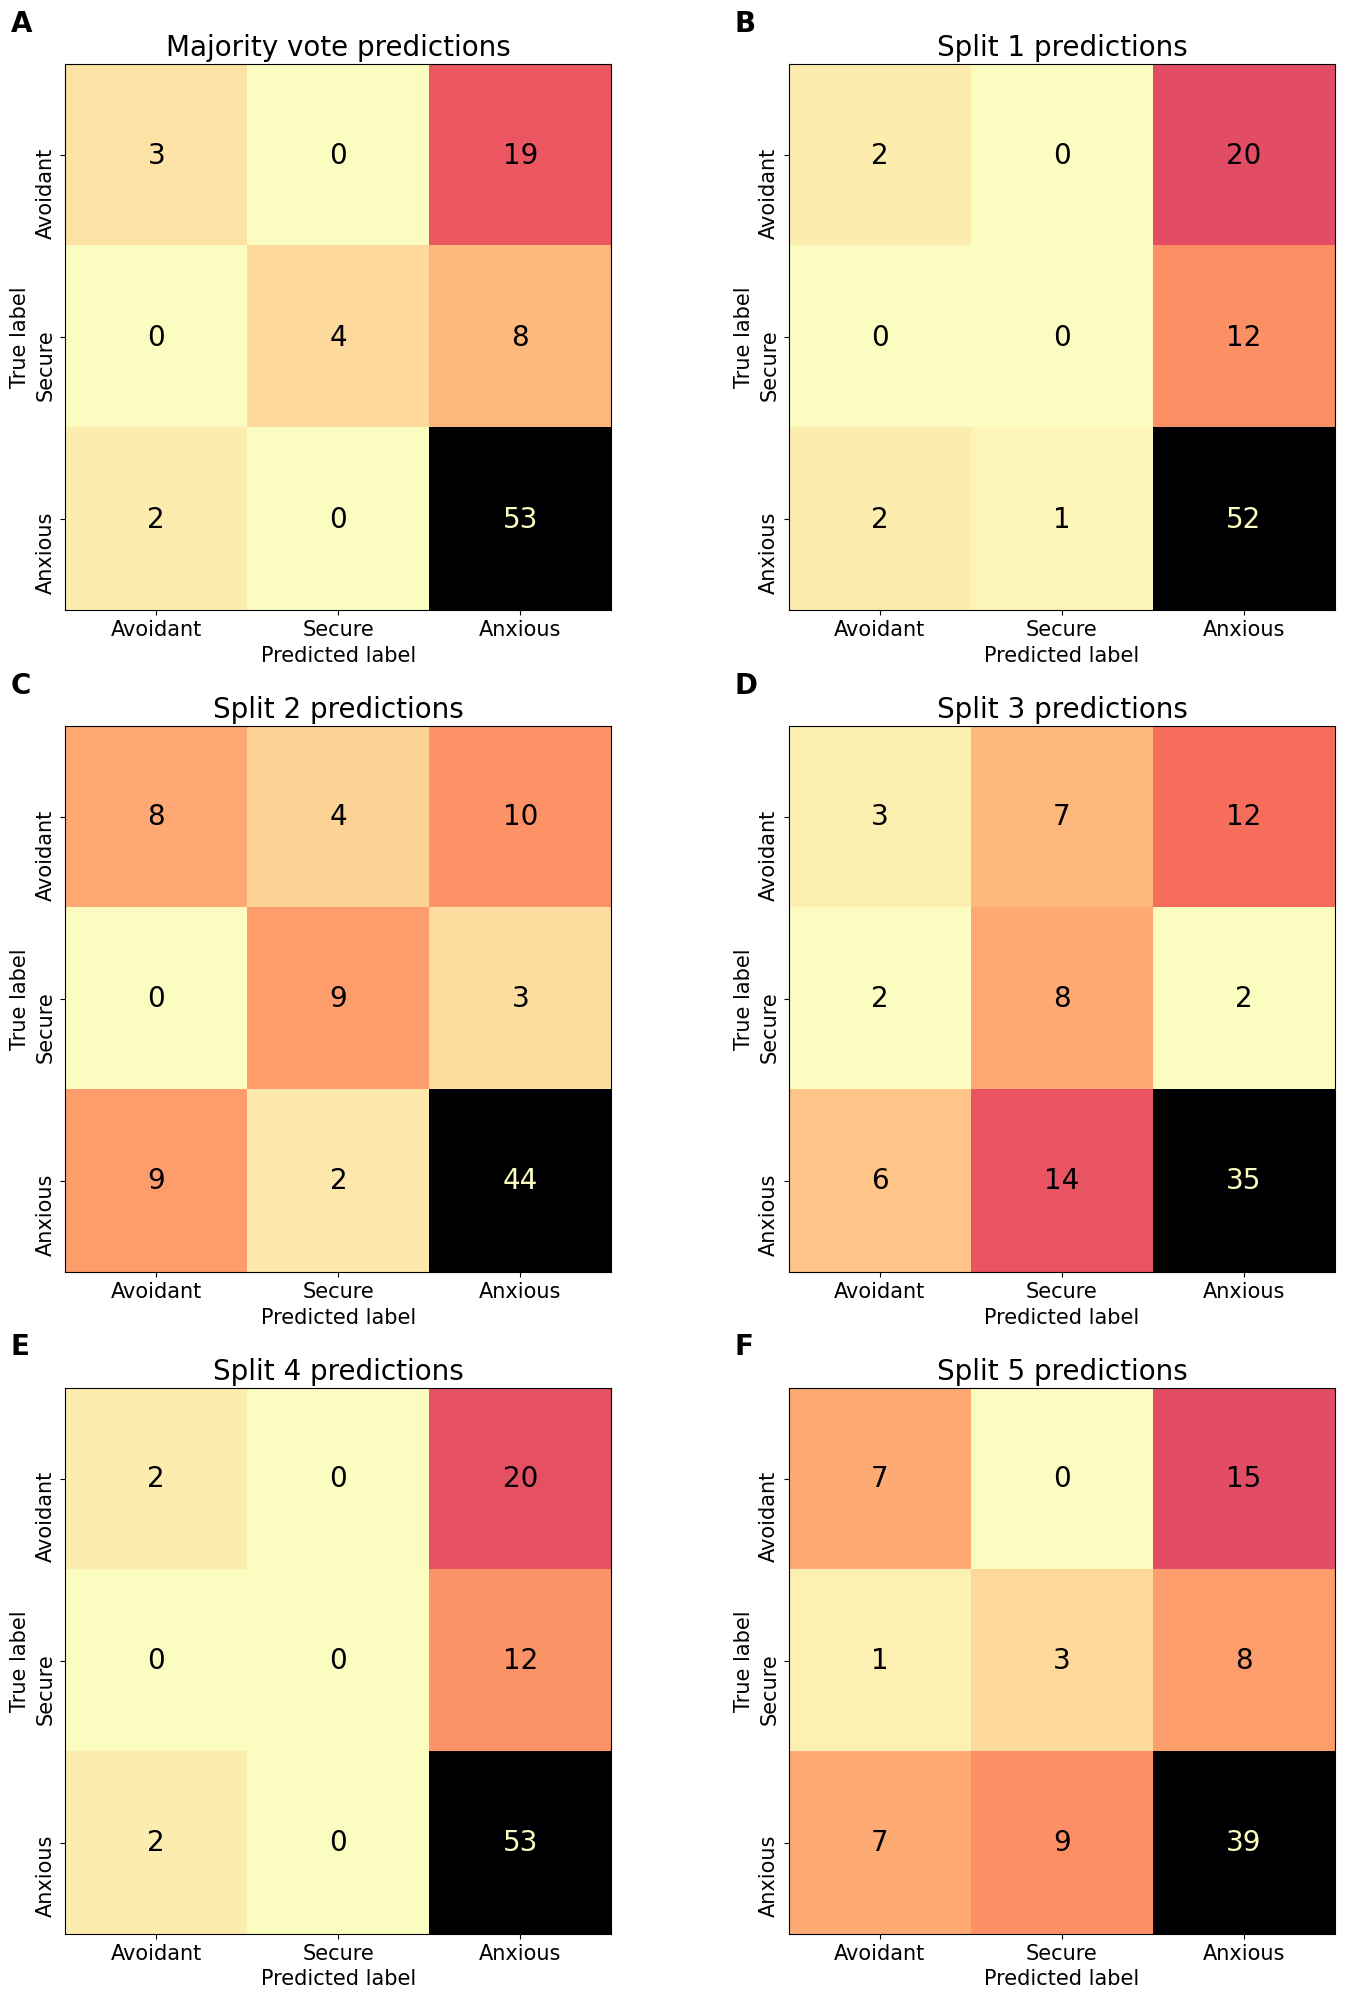

In [128]:
fig, axs = plt.subplots(3, 2, figsize=(15, 20))  # create a 3x2 grid of subplots
title_size = 20
text_size = 20
tick_size = 15
label_size = 15

# Plot the confusion matrices
ConfusionMatrixDisplay(cm_total, display_labels=["Avoidant", "Secure", "Anxious"]).plot(cmap=cmap, ax=axs[0, 0], text_kw={"size": text_size}, colorbar=False)
axs[0, 0].set_title("Majority vote predictions", fontsize=title_size)

ConfusionMatrixDisplay(cm_1, display_labels=["Avoidant", "Secure", "Anxious"]).plot(cmap=cmap, ax=axs[0, 1], text_kw={"size": text_size}, colorbar=False)
axs[0, 1].set_title("Split 1 predictions", fontsize=title_size)

ConfusionMatrixDisplay(cm_2, display_labels=["Avoidant", "Secure", "Anxious"]).plot(cmap=cmap, ax=axs[1, 0], text_kw={"size": text_size}, colorbar=False)
axs[1, 0].set_title("Split 2 predictions", fontsize=title_size)

ConfusionMatrixDisplay(cm_3, display_labels=["Avoidant", "Secure", "Anxious"]).plot(cmap=cmap, ax=axs[1, 1], text_kw={"size": text_size}, colorbar=False)
axs[1, 1].set_title("Split 3 predictions", fontsize=title_size)

ConfusionMatrixDisplay(cm_4, display_labels=["Avoidant", "Secure", "Anxious"]).plot(cmap=cmap, ax=axs[2, 0], text_kw={"size": text_size}, colorbar=False)
axs[2, 0].set_title("Split 4 predictions", fontsize=title_size)

ConfusionMatrixDisplay(cm_5, display_labels=["Avoidant", "Secure", "Anxious"]).plot(cmap=cmap, ax=axs[2, 1], text_kw={"size": text_size}, colorbar=False)
axs[2, 1].set_title("Split 5 predictions", fontsize=title_size)

# Rotate the y-axis labels
for ax in axs.flat:
    labels = ax.get_yticklabels()
    ax.set_yticklabels(labels, rotation=90)
    ax.tick_params(axis='both', which='major', labelsize=label_size)  # Change tick label font size
    ax.xaxis.label.set_size(tick_size)  # Change x-axis label font size
    ax.yaxis.label.set_size(tick_size)  # Change y-axis label font size
    
# Label the subplots
labels = ['A', 'B', 'C', 'D', 'E', 'F']
for ax, label in zip(axs.flat, labels):
    ax.text(-0.1, 1.1, label, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top')

# Adjust the layout
plt.tight_layout()
# fig.colorbar(axs[0, 0].get_images()[0], ax=axs, orientation='vertical', fraction=.1, pad=0.05, aspect=80)

# Save the figure
plt.savefig("../TeX/figures/combined_confusion_matrix.png")
plt.show()

# Validation results table

In [122]:
import statistics

accs = [35.82, 59.68, 52.52, 48.61, 49.15]

mean_accs = statistics.mean(accs)
std_dev_accs = statistics.stdev(accs)

print(f"Mean: {round(mean_accs, 2)}")
print(f"Standard Deviation: {round(std_dev_accs, 2)}")

Mean: 49.16
Standard Deviation: 8.66


In [137]:
val_results = pd.read_excel("val_results.xlsx")

In [138]:
val_results.ffill(inplace=True)

In [139]:
val_results.rename(columns={"avg_val_acc": "Average validation set accuracy", "val_std": "Standard deviation"}, inplace=True)

In [140]:
# val_results.set_index(['Encoder', val_results.index], inplace=True)

In [141]:
val_results.to_latex("../TeX/figures/val_results.tex", index=False)

In [142]:
val_results

,Encoder,Minimum turn length,Average validation set accuracy,Standard deviation
0,RoBERTa baseline,0,45.28,7.21
1,RoBERTa baseline,50,47.37,5.47
2,RoBERTa baseline,100,51.99,7.42
3,RoBERTa baseline,150,51.78,4.27
4,RoBERTa baseline,250,59.86,9.67
5,RoBERTa-Large,0,49.27,3.40
6,RoBERTa-Large,50,48.84,5.40
7,RoBERTa-Large,100,54.88,6.94
8,RoBERTa-Large,150,56.15,5.21
9,RoBERTa-Large,250,58.67,11.64


# Orthogonal scales visualisation

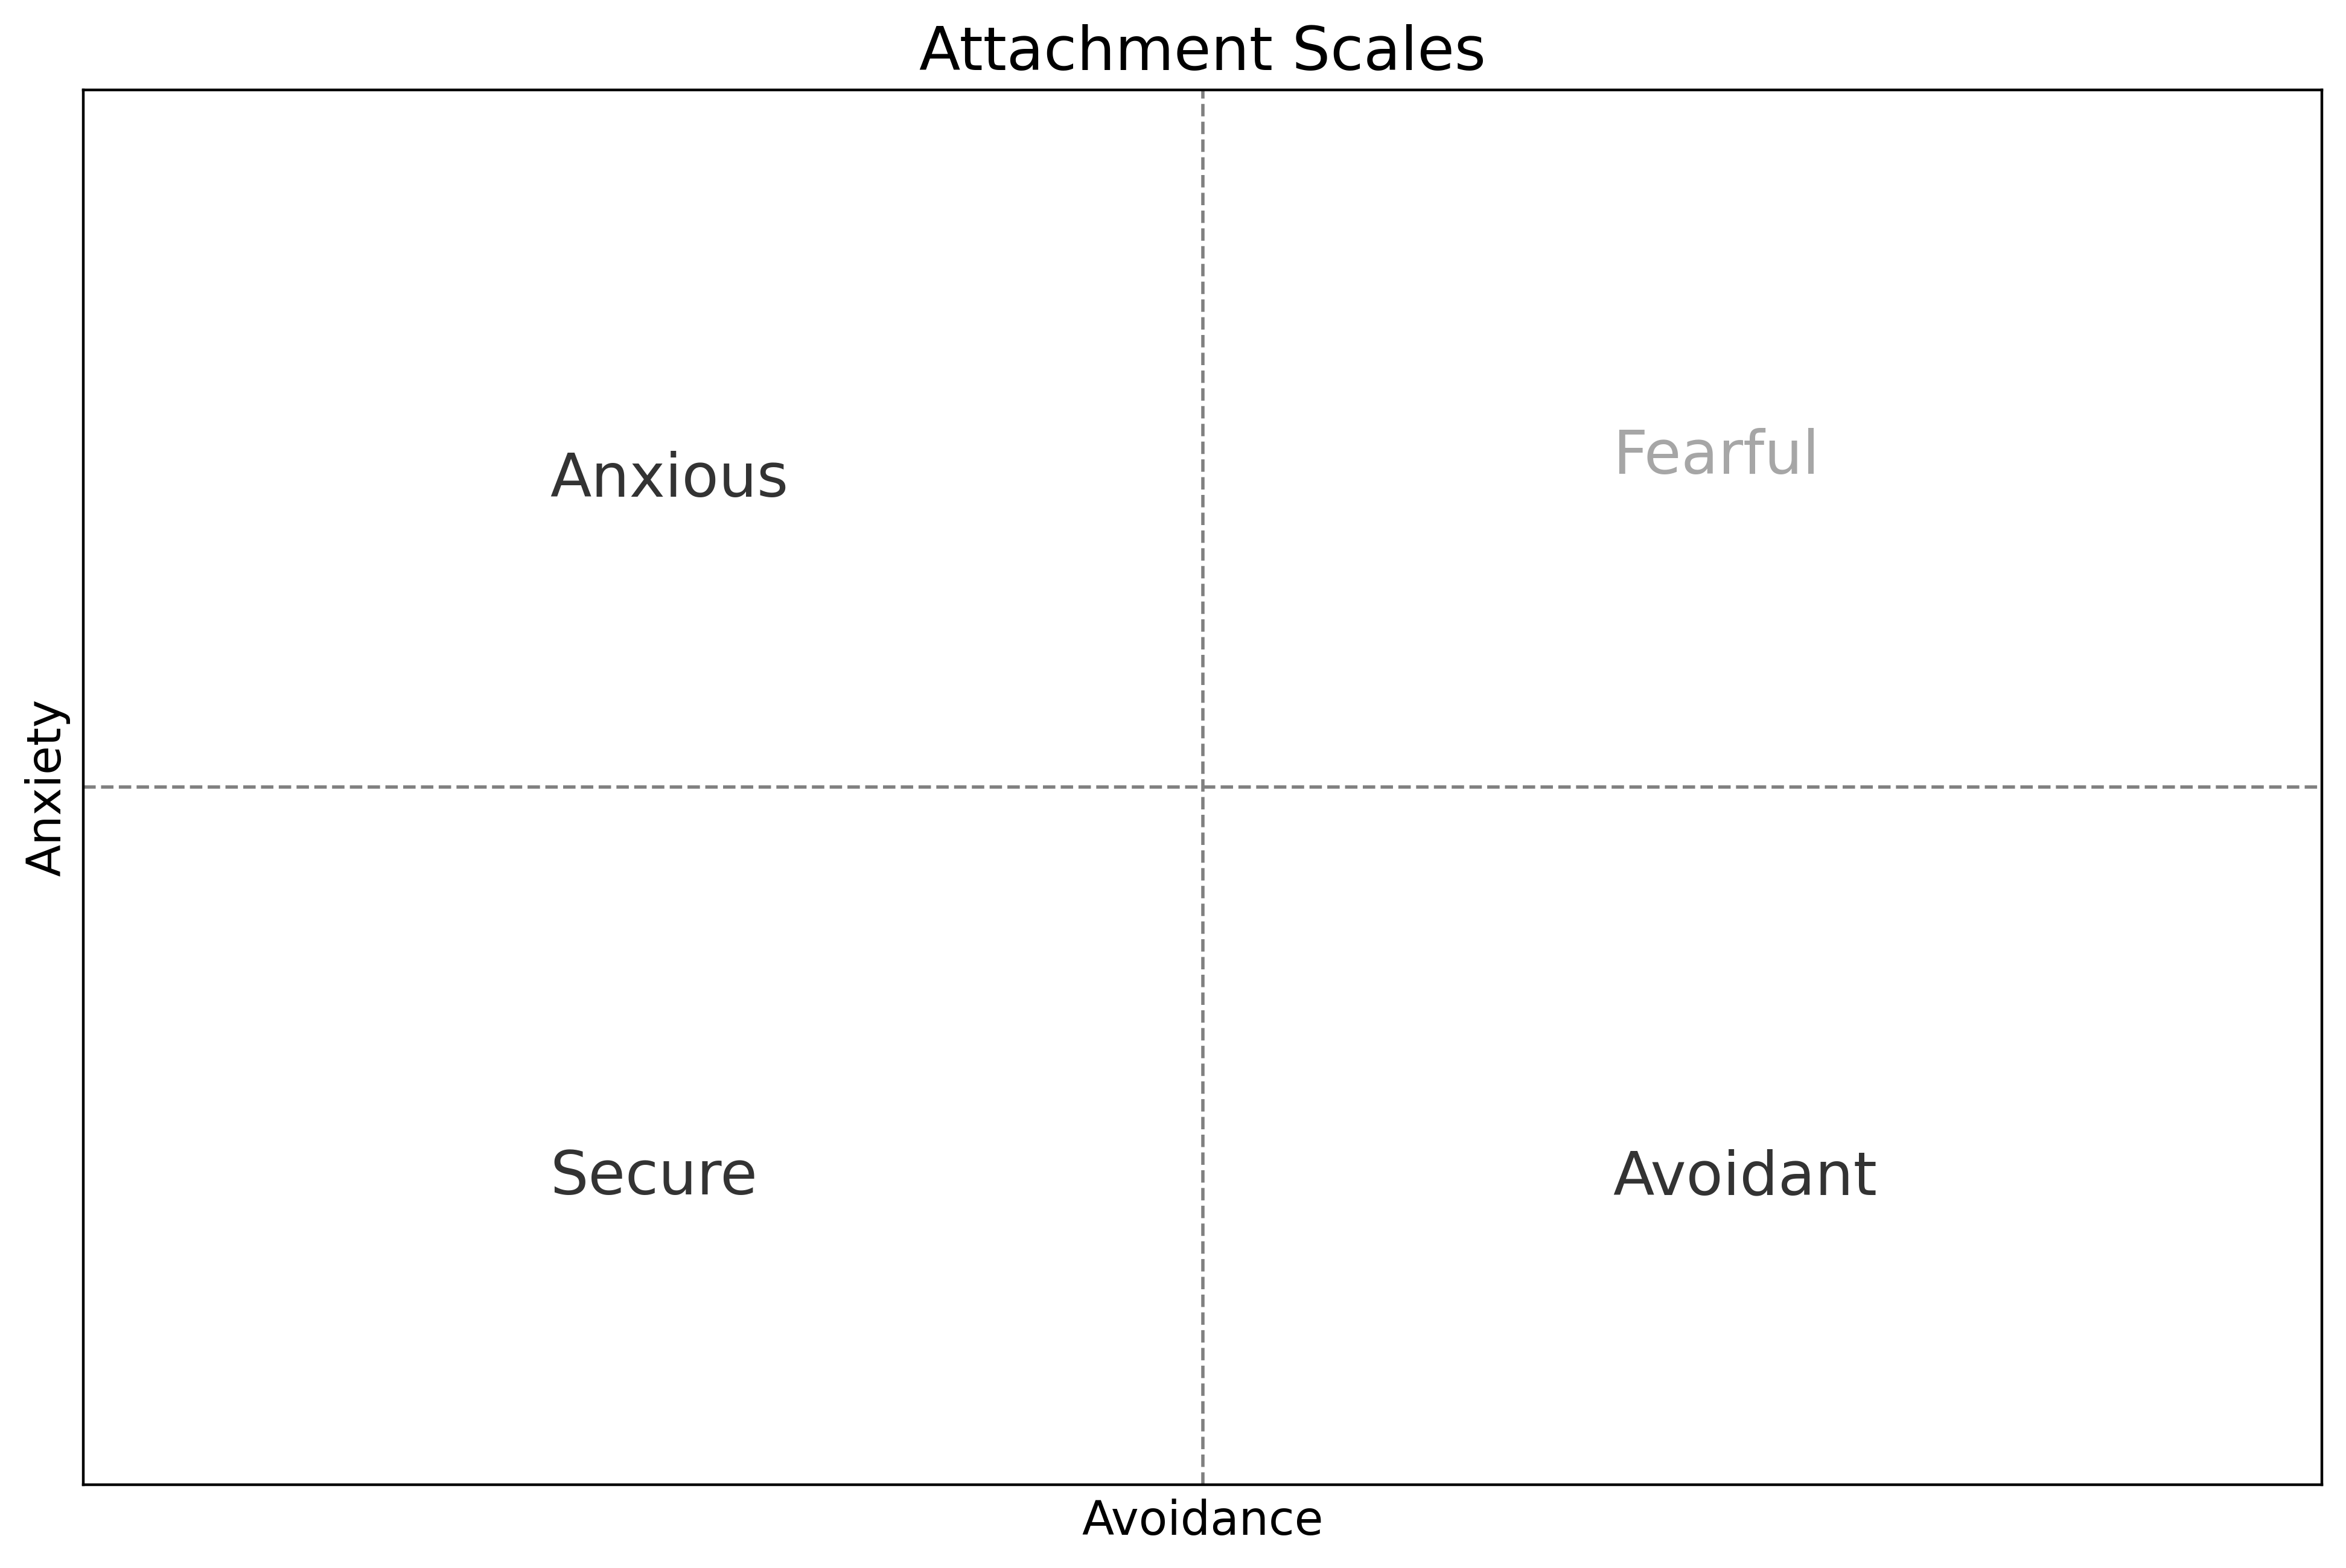

In [167]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=400)
fig.tight_layout()
fig.subplots_adjust(top=0.88)  # adjust the top padding
# fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# labels
plt.title("Attachment Scales", fontsize=18)
plt.xlabel("Avoidance", fontsize=14)
plt.ylabel("Anxiety", fontsize=14)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

# lines
ax.axhline(3, color="gray", linewidth=1, ls="--") # add horizontal line
ax.axvline(3, color="gray", linewidth=1, ls="--") # add vertical line

# text
plt.text(1.25, 1.25, "Secure", fontsize=18, color="black", alpha=0.8)
plt.text(4.1, 1.25, "Avoidant", fontsize=18, color="black", alpha=0.8)
plt.text(1.25, 4.25, "Anxious", fontsize=18, color="black", alpha=0.8)
plt.text(4.1, 4.35, "Fearful", fontsize=18, color="black", alpha=0.35)

# Set axis limits
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

fig.set_facecolor("white") # set background colour to white to make labels and title visible in dark mode

plt.savefig("../TeX/figures/attachment_scales.png")
plt.show()